In [2]:
import cv2
import os
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
def readPictures():
    X = []
    y = []
    classes = ["book","coin","cup","cutlery","face","gesture","glass","nail_polish","pen","plant","plate","shoe"]
    base_path = 'Project9_pictures/'

    for i, target in enumerate(classes):
        files = os.listdir(base_path+target)
        for file in files: 
            # load the image
            current_path=base_path+target+"/"+file
            img = cv2.imread(current_path)
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # convert it to an array
            img_array = cv2.resize(img_gray,(28,28))
            # append the array to X
            X.append(img_array)
            # append the numeric target to y
            y.append(i)
            
    X = np.array(X)
    y = np.array(y)

    # shuffle the data
    shuffler = np.random.permutation(len(X))
    X = X[shuffler]
    y = y[shuffler]
    return X,y

In [4]:
X,y=readPictures()

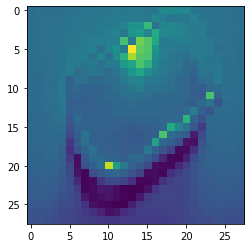

In [5]:
plt.imshow(X[0])

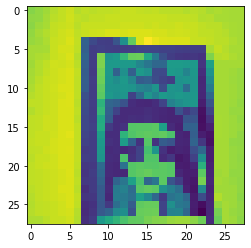

In [33]:
plt.imshow(X[5])

In [6]:
X.shape

(1279, 28, 28)

In [7]:
y.shape

(1279,)

In [60]:
# Model / data parameters
num_classes = 12
input_shape = (28, 28,1)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# Choose your test size to split between training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=False)

In [54]:
X_train.shape, y_train.shape

((959, 28, 28), (959,))

In [55]:
X_test.shape, y_test.shape

((320, 28, 28), (320,))

#### Scale Images

In [56]:
# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [57]:
X_train

array([[[0.5568628 , 0.5647059 , 0.5686275 , ..., 0.57254905,
         0.5686275 , 0.56078434],
        [0.56078434, 0.5686275 , 0.57254905, ..., 0.57254905,
         0.5686275 , 0.56078434],
        [0.56078434, 0.5686275 , 0.57254905, ..., 0.5686275 ,
         0.57254905, 0.5647059 ],
        ...,
        [0.5058824 , 0.5019608 , 0.5019608 , ..., 0.5019608 ,
         0.49803922, 0.49019608],
        [0.49411765, 0.49411765, 0.49411765, ..., 0.49411765,
         0.4862745 , 0.4862745 ],
        [0.49019608, 0.49019608, 0.48235294, ..., 0.48235294,
         0.48235294, 0.47843137]],

       [[0.56078434, 0.56078434, 0.5568628 , ..., 0.5372549 ,
         0.54901963, 0.5294118 ],
        [0.5568628 , 0.5529412 , 0.5529412 , ..., 0.5372549 ,
         0.5294118 , 0.5137255 ],
        [0.54901963, 0.54901963, 0.54509807, ..., 0.52156866,
         0.52156866, 0.5294118 ],
        ...,
        [0.4862745 , 0.48235294, 0.49019608, ..., 0.47058824,
         0.46666667, 0.45882353],
        [0.4

#### One Hot Encode for y

In [58]:
# one hot encode
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Define the Keras Model

In [62]:
from tensorflow.keras import backend as K

K.clear_session()
# define the keras model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

#### Model Summary

In [63]:
# model summary table
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dropout (Dropout)           (None, 400)               0

In [64]:
# define the batch size and number of epochs
batch_size = 16
epochs = 100

In [65]:
# complile and define eval metric
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [66]:
# fit the model
history=model.fit(X_train, y_train, epochs=epochs, validation_split=0.2)

Epoch 1/100
24/24 [==============================] - 1s 18ms/step - loss: 2.4233 - accuracy: 0.1747 - val_loss: 2.3602 - val_accuracy: 0.1979
Epoch 2/100
24/24 [==============================] - 0s 10ms/step - loss: 2.3282 - accuracy: 0.1838 - val_loss: 2.3195 - val_accuracy: 0.2083
Epoch 3/100
24/24 [==============================] - 0s 10ms/step - loss: 2.2250 - accuracy: 0.2386 - val_loss: 2.1570 - val_accuracy: 0.3125
Epoch 4/100
24/24 [==============================] - 0s 10ms/step - loss: 1.9923 - accuracy: 0.3559 - val_loss: 1.9262 - val_accuracy: 0.3385
Epoch 5/100
24/24 [==============================] - 0s 9ms/step - loss: 1.7432 - accuracy: 0.4159 - val_loss: 1.6883 - val_accuracy: 0.4427
Epoch 6/100
24/24 [==============================] - 0s 10ms/step - loss: 1.5633 - accuracy: 0.4772 - val_loss: 1.5315 - val_accuracy: 0.5573
Epoch 7/100
24/24 [==============================] - 0s 9ms/step - loss: 1.4742 - accuracy: 0.5176 - val_loss: 1.4363 - val_accuracy: 0.5156
Epoch 8/

## Evaluation

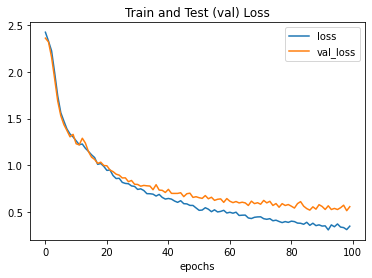

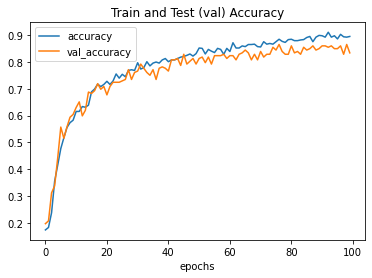

In [67]:
losses_accurs = pd.DataFrame(history.history)

losses_accurs[['loss', 'val_loss']].plot()
plt.gcf().set_facecolor('white')
plt.title('Train and Test (val) Loss')
plt.xlabel('epochs')
plt.show()

losses_accurs[['accuracy', 'val_accuracy']].plot()
plt.gcf().set_facecolor('white')
plt.title('Train and Test (val) Accuracy')
plt.xlabel('epochs')
plt.show()

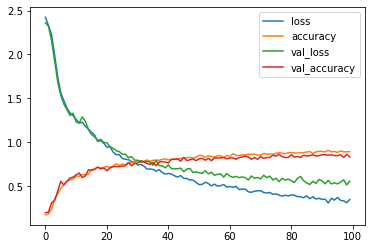

In [68]:
# Plot model accuracy and loss:
pd.DataFrame(history.history).plot()
plt.gcf().set_facecolor('white')

In [69]:
# evaluate the model and print the results
score = model.evaluate(X_train, y_train, verbose=0)
print("Train loss:", score[0])
print("Train accuracy:", score[1])

Train loss: 0.3155694305896759
Train accuracy: 0.9176225066184998


In [70]:
# evaluate the model and print the results
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.4938245415687561
Test accuracy: 0.8343750238418579


### Saving Model

In [71]:
# serialize model
model.save("models/model_gray.h5")
print("Saved model to disk")

Saved model to disk


In [72]:
r=X[0].reshape(1,28,28,1)

In [73]:
r.shape

(1, 28, 28, 1)

In [74]:
model.input.shape

TensorShape([None, 28, 28, 1])

In [75]:
model.predict(r)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [81]:
r=X[100].reshape(1,28,28,1)

In [82]:
r

array([[[[144],
         [144],
         [145],
         [145],
         [146],
         [147],
         [148],
         [150],
         [149],
         [150],
         [152],
         [152],
         [152],
         [152],
         [153],
         [152],
         [151],
         [153],
         [153],
         [152],
         [154],
         [153],
         [153],
         [153],
         [153],
         [153],
         [151],
         [151]],

        [[144],
         [145],
         [147],
         [149],
         [148],
         [150],
         [152],
         [152],
         [153],
         [153],
         [156],
         [155],
         [149],
         [154],
         [155],
         [155],
         [153],
         [154],
         [154],
         [152],
         [155],
         [154],
         [154],
         [153],
         [152],
         [154],
         [156],
         [155]],

        [[144],
         [145],
         [149],
         [149],
         [151],
         [152],
    

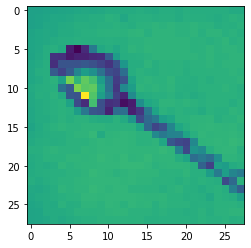

In [84]:
plt.imshow(X[100])

In [85]:
model.predict(r)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)